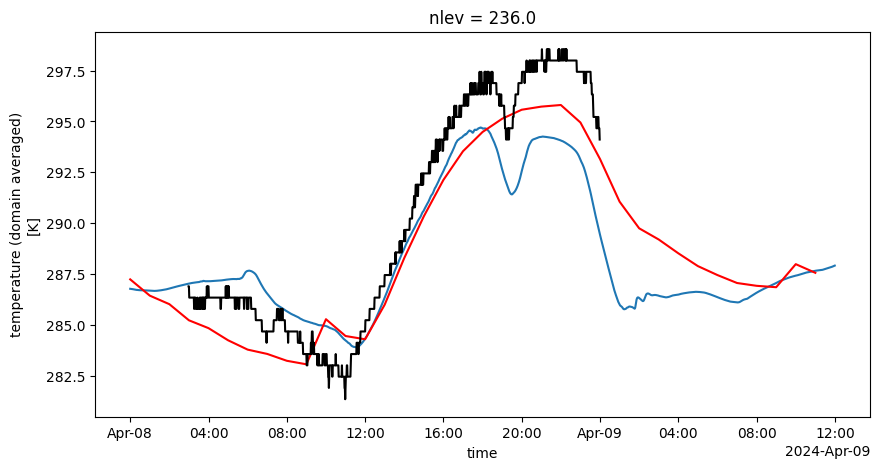

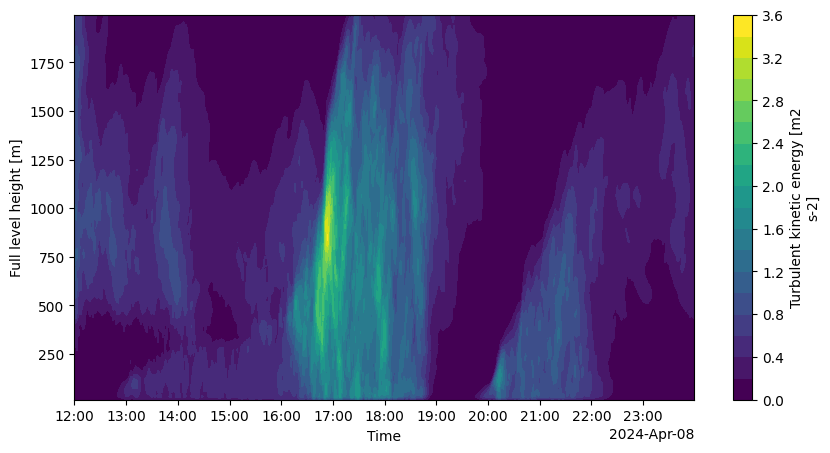

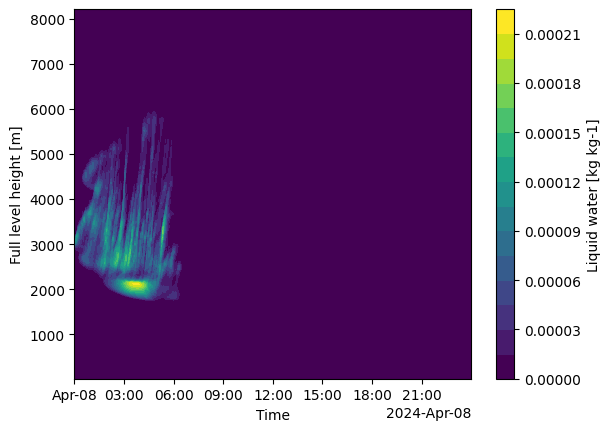

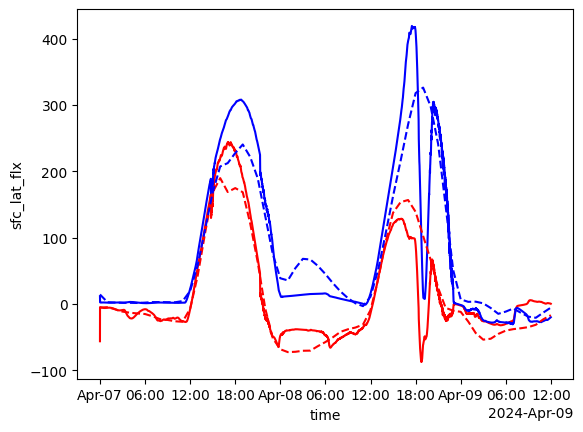

In [2]:
import open_xarray as ox
import numpy as np
import xarray as xr
import matplotlib.pyplot as pl
import pandas as pd
from metpy.units import units, pandas_dataframe_to_unit_arrays

# Load the data
ds=ox.open_xarray('/fs/ess/PFS0220/LSM/Eclipse/IND_20240408_NE/IND.default.0000000.nc')
ERA=xr.open_dataset('/users/PFS0220/graghuna/microhh/microhh_t/microhh/python/data/forcings/IND_20240408.kpt.nc',decode_times=True)
df = pd.read_csv('/fs/ess/PFS0220/LSM/Eclipse/Observation/eclipse_obs.txt')
df['valid(UTC)'] = pd.to_datetime(df['valid(UTC)'])
vars = ['tmpf','dwpf','sknt','drct','gust_sknt','gust_drct']
df[vars] = df[vars].apply(pd.to_numeric, errors='coerce')

fig, ax = pl.subplots(1,1,figsize=(10,5))   
ds.T.sel(z=15).isel(time=slice(24*120,60*120)).plot()
ERA.t.isel(time=slice(24,60)).isel(nlev=235).plot.line('r-')
pl.plot(df.loc[df['station']=='GEZ', 'valid(UTC)'].values, (df.loc[df['station']=='GEZ', 'tmpf'].values-32)*5/9+273, 'k-')

pl.figure(figsize=(10,5))
ds.isel(time=slice(36*120,48*120)).tke.sel(z=slice(10,2000)).plot.contourf(x='time',levels=20)

pl.figure()
ds.ql.isel(time=slice(24*120,48*120)).plot.contourf(x='time',levels=20)

pl.figure()
ds.H.plot.line('r-',x='time')
ds.LE.plot.line('b-',x='time')
(-1*ERA['sfc_sens_flx']).plot.line('r--',x='time')
(-1*ERA['sfc_lat_flx']).plot.line('b--',x='time')

In [7]:
df.station.unique()

array(['BKL', 'CLE', 'DCU', 'GEZ', 'PNC'], dtype=object)

[[276.39453       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan]
 [      nan       nan       nan       nan 277.2881  277.2881  277.25385
        nan 277.083   277.083         nan]
 [      nan       nan       nan       nan 277.2881  277.2881  277.24426
  277.18378 277.1233  277.08316 277.0953 ]
 [      nan       nan       nan       nan 276.8457  276.97205 276.94235
  276.88678 276.84537 276.90155 276.90857]
 [      nan 277.04492 276.85196 276.48016 276.2646  276.55676 276.5479
  276.54367 276.6059  276.6621  276.6687 ]
 [277.04492 277.04492 276.9217  276.68408 276.44632 276.20844 276.24194
  276.30408 276.3664  276.42267 276.42926]
 [276.83032 276.8807  276.8938  276.65976 276.4258  276.34134 276.3697
  276.4321

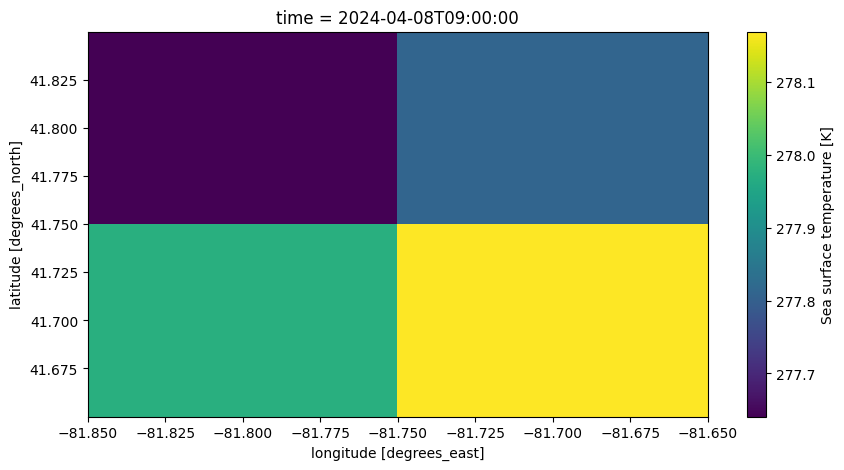

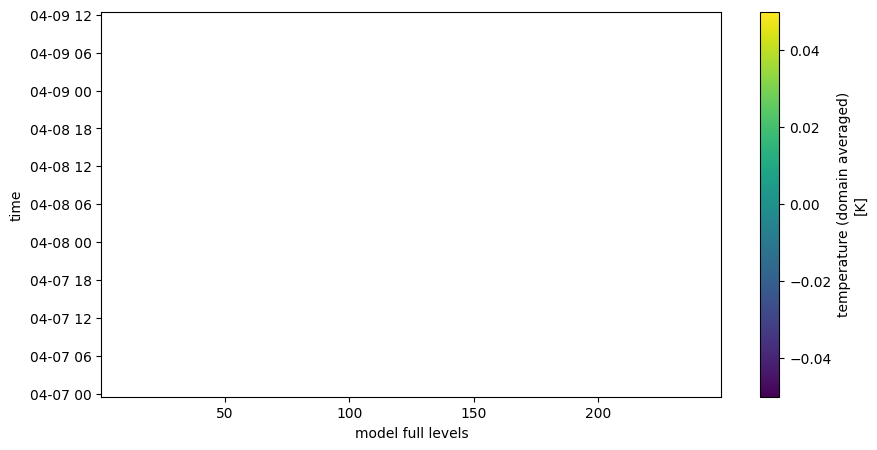

In [16]:
import xarray as xr
import matplotlib.pyplot as pl
ds=xr.open_dataset('/users/PFS0220/graghuna/microhh/microhh_t/microhh/python/data/domains/ERIE_data/an_single_2024-04-08.nc')
ds_kpt=xr.open_dataset('/users/PFS0220/graghuna/microhh/microhh_t/microhh/python/data/forcings/ERIE.kpt.nc')

pl.figure(figsize=(10,5))
ds.sst.isel(time=9,latitude=slice(12,14),longitude=slice(2,4)).plot()

pl.figure(figsize=(10,5))
ds_kpt['t'].plot()
print(ds.sst.isel(time=9).values)

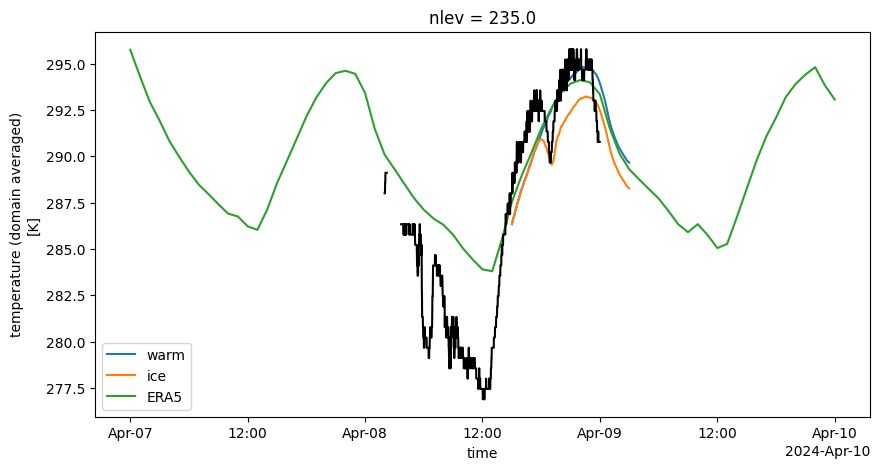

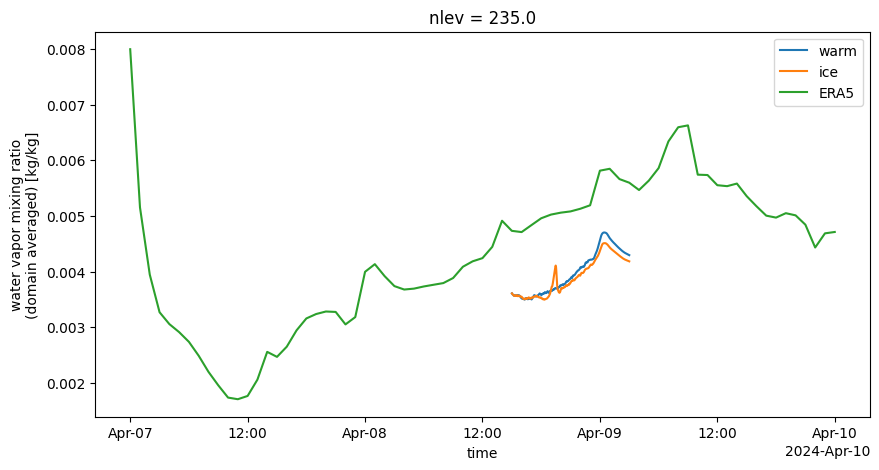

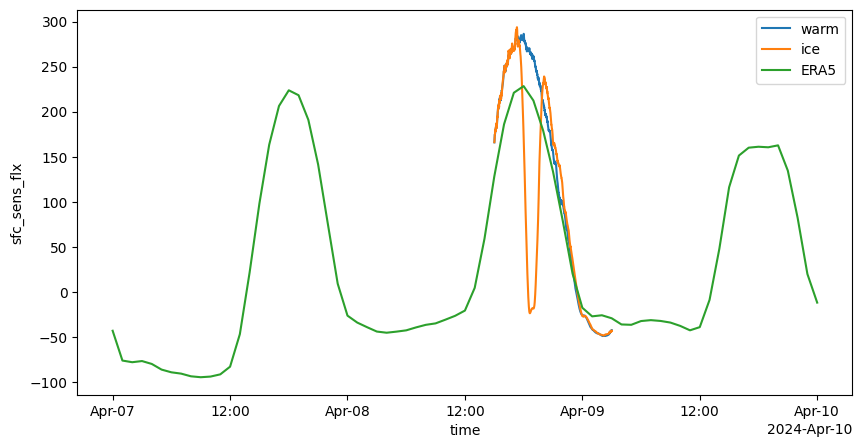

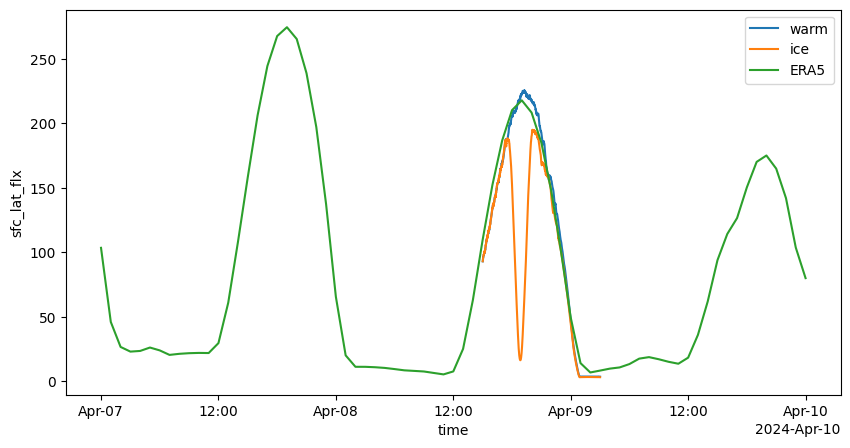

<Figure size 1000x500 with 0 Axes>

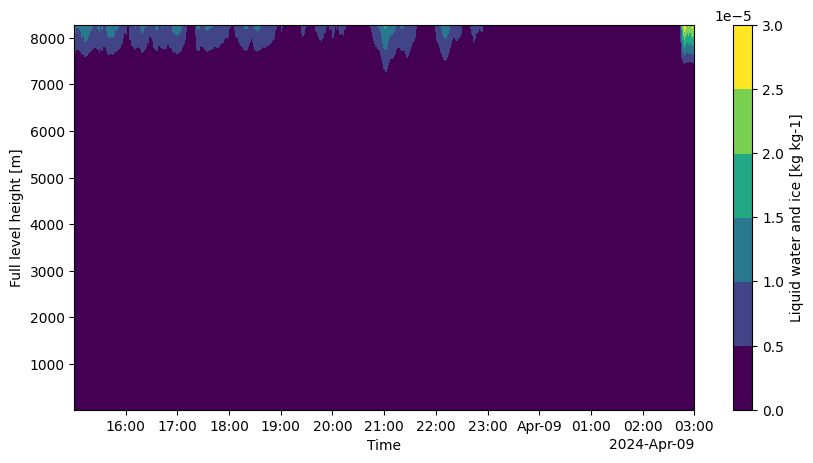

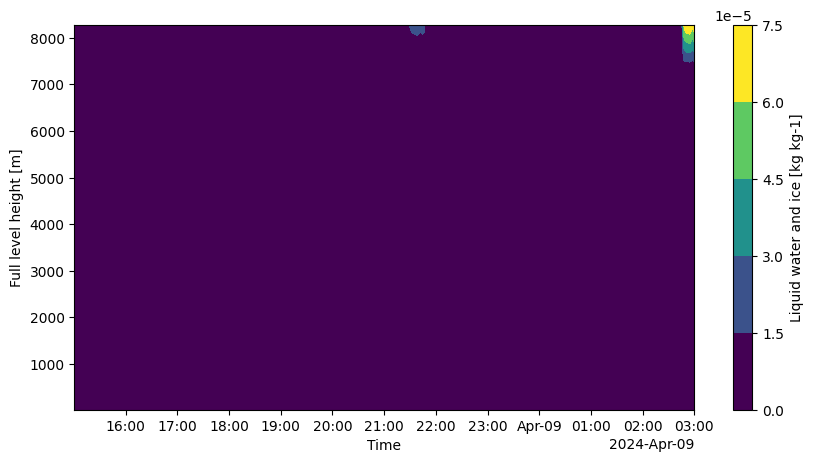

In [5]:
import xarray as xr
import matplotlib.pyplot as pl
from netCDF4 import Dataset
import pandas as pd
import hvplot.xarray

ncpath='/fs/ess/PFS0220/LSM/Eclipse/SGP_20240408_128_withouteclipse/SGP.default.0001404.nc'
ncpath2='/fs/ess/PFS0220/LSM/Eclipse/SGP_20240408_128_witheclipse/SGP.default.0001404.nc'

def open_mhh(ncpath):
    mhh_output = xr.open_dataset(ncpath,decode_times=True)
    rootgroup = Dataset(ncpath,"r")
    for group in rootgroup.groups:
        mhh_output=xr.merge([mhh_output, xr.open_dataset(ncpath,group=group,decode_times=True)])
    return mhh_output;

ds=open_mhh(ncpath)
#ds2=ds
ds2=open_mhh(ncpath2)
df = pd.read_csv('/fs/ess/PFS0220/LSM/Eclipse/Observation/eclipse_obs.txt')
df['valid(UTC)'] = pd.to_datetime(df['valid(UTC)'])
vars = ['tmpf','dwpf','sknt','drct','gust_sknt','gust_drct']
df[vars] = df[vars].apply(pd.to_numeric, errors='coerce')


ds_in=xr.open_dataset('/users/PFS0220/graghuna/microhh/microhh_t/microhh/python/data/forcings/SGP_20240408.kpt.nc',decode_times=True)

pl.figure(figsize=(10,5))
ds.T.isel(z=0).plot.line(label='warm')
ds2.T.isel(z=0).plot.line(label='ice')
ds_in.t.isel(nlev=234).plot.line(label='ERA5')
pl.plot(df.loc[df['station']=='PNC', 'valid(UTC)'].values, (df.loc[df['station']=='PNC', 'tmpf'].values-32)*5/9+273, 'k-')
pl.legend()

pl.figure(figsize=(10,5))
ds.qt.isel(z=0).plot.line(label='warm')
ds2.qt.isel(z=0).plot.line(label='ice')
ds_in.q.isel(nlev=234).plot.line(label='ERA5')
pl.legend()

pl.figure(figsize=(10,5))
ds.H.plot.line(label='warm')
ds2.H.plot.line(label='ice')
(ds_in['sfc_sens_flx']*-1).plot.line(label='ERA5')
pl.legend()

pl.figure(figsize=(10,5))
ds.LE.plot.line(label='warm')
ds2.LE.plot.line(label='ice')
(ds_in['sfc_lat_flx']*-1).plot.line(label='ERA5')
pl.legend()

pl.figure(figsize=(10,5))
tke=ds.tke.sel(z=slice(0,2000)).isel(time=slice(39*12,48*12))
tke.hvplot()

pl.figure(figsize=(10,5))
ds2.qlqi.isel(time=slice(0,60*120)).plot.contourf(x='time')

pl.figure(figsize=(10,5))
ds.qlqi.isel(time=slice(0,60*120)).plot.contourf(x='time')

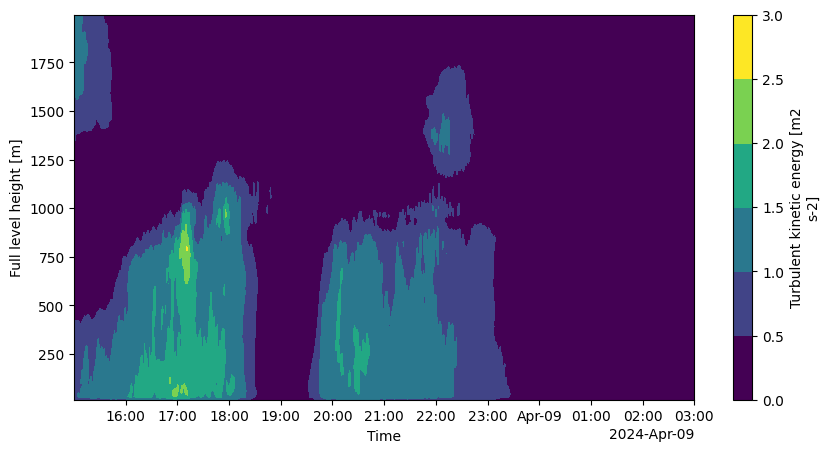

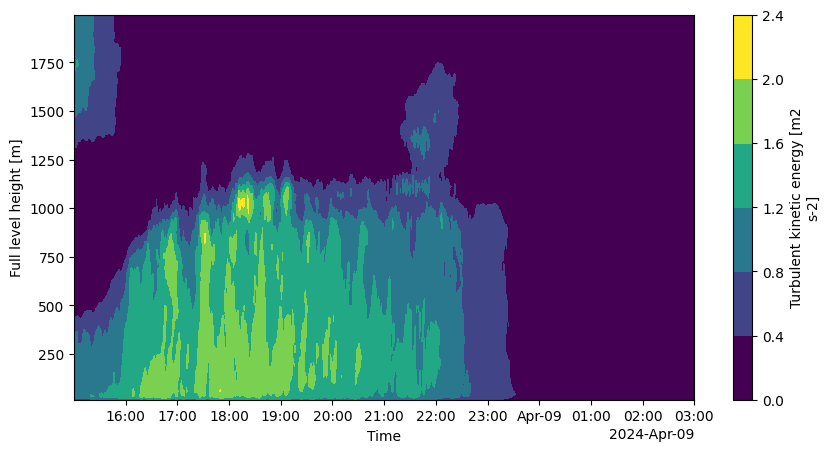

In [17]:
pl.figure(figsize=(10,5))
tke=ds2.tke.sel(z=slice(0,2000)).isel(time=slice(0,None))
tke.plot.contourf(x='time')

pl.figure(figsize=(10,5))
tke=ds.tke.sel(z=slice(0,2000)).isel(time=slice(0,None))
tke.plot.contourf(x='time')

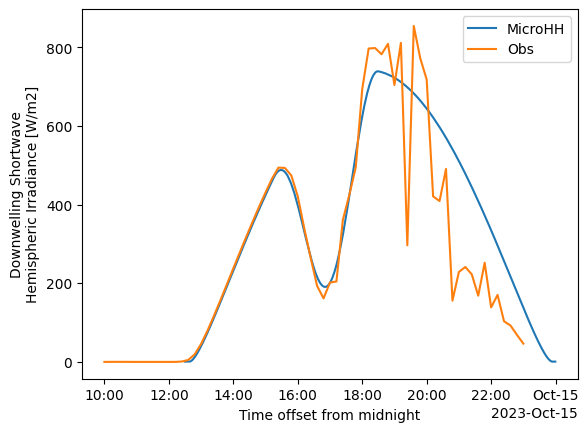

In [19]:
ds_obs=xr.open_dataset('/fs/ess/PFS0220/LSM/Eclipse/Observation/sgp_eclipse/sgpbeflux1longC1c1/sgpbeflux1longC1.c1.20231014.000000.cdf')
#ds_obs=xr.open_dataset('/fs/ess/PFS0220/LSM/Eclipse/Observation/sgp_eclipse/sgpbeflux1longC1c1/sgpbeflux1longC1.c1.20240408.000000.cdf')

pl.figure()
#ds_in['msnswrfcs'].isel(time=slice(36,44)).plot()
ds.sw_flux_dn_clear.isel(zh=0,time=slice(int(36.5*120),48*120)).plot.line(label='MicroHH')
ds_obs['down_short_hemisp'].sel(time=slice('2023-10-14T10:00:00','2023-10-14T23:00:00')).isel(time=slice(None,None,12)).plot.line(label='Obs')
pl.legend()

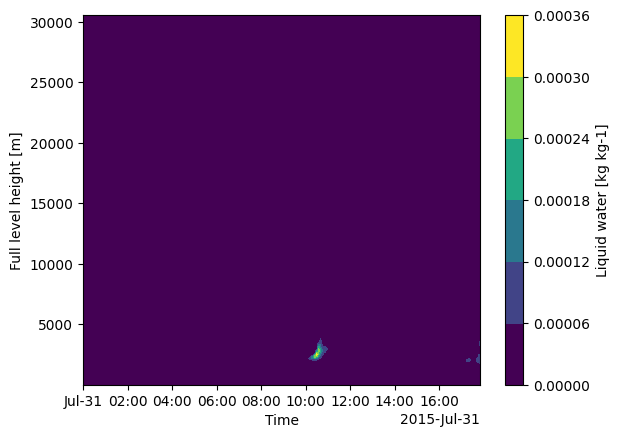

In [10]:
import open_xarray as ox


ds=ox.open_xarray('/fs/ess/PFS0220/LSM/SGP/SGP_20150801/SGP.default.0000000.nc')
ds.ql.isel(time=slice(0*12,48*120)).plot.contourf(x='time')